<a href="https://colab.research.google.com/github/Joel-Williams-Mathew/PaceLab-Internship/blob/main/PaceLabDay2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPERVISED LEARNING

## **Classification**

**Iris Species Classification using Naive Bayes**

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Last 5 rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5

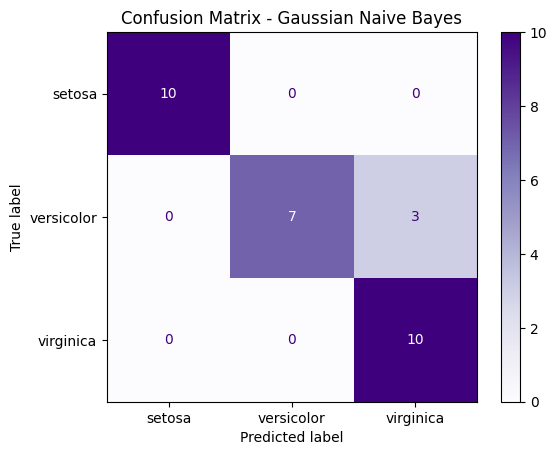

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:
# 1. Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data     # Features (sepal length, petal length, etc.)
y = iris.target   # Labels (species: 0, 1, 2)(0 = setosa, 1 = versicolor, 2 = virginica)

# 2. Convert to DataFrame
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
# Display first few rows
print("First 5 rows:")
print(df.head())
# Display last few rows
print("\nLast 5 rows:")
print(df.tail())
# Shape of the dataset
print("\nShape of the dataset:")
print(df.shape)  # (rows, columns)
# Statistical description
print("\nStatistical Summary:")
print(df.describe())

# 3. Check for missing values in each column
print(df.isnull().sum()) # sum calculate the true and false values from column and rows continuously
# OR check if *any* missing values exist
print("\nAny missing values?", df.isnull().values.any())

# 4. Split the data (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 5. Gaussian naive bayes classifier
# Initialize the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train the model on the training data
gnb.fit(X_train, y_train)
# Predict on the test data
y_pred = gnb.predict(X_test)

# 6. Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Purples")  # You can change the color map if you like
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

**Logistic Regression**

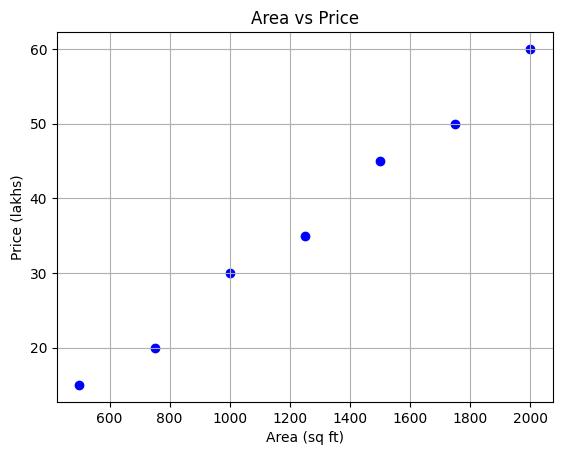

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline

# Lets create a simple dataset for House Prices
# Depending on the area, price prediction occurs
# Features: Area in sqft, Price
area = np.array([500, 750, 1000, 1250, 1500, 1750, 2000]).reshape(-1, 1) #Column vector
price = np.array([15,20,30,35,45,50,60]) #Row vector
plt.scatter(area, price, color='blue')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (lakhs)')
plt.grid(True)
plt.show()

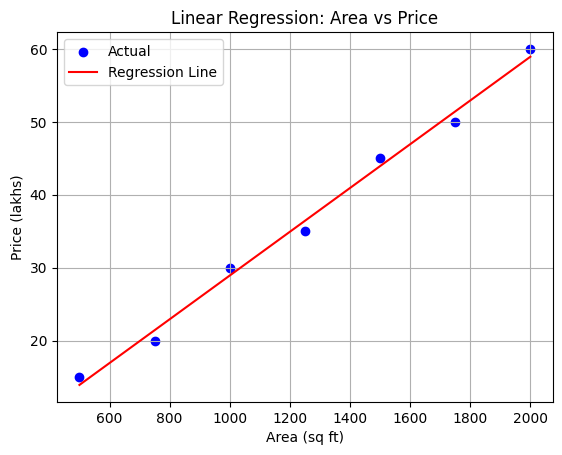

In [ ]:
#Training the model
model = LinearRegression()
model.fit(area,price)
#Prediction
price_pred = model.predict(area)
plt.scatter(area, price, color='blue', label='Actual') #Blue dot as actual value
plt.plot(area, price_pred, color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (lakhs)')
plt.legend() #From label
plt.title('Linear Regression: Area vs Price')
plt.grid(True)
plt.show()

In [ ]:
#Evaluate the model
mse = mean_squared_error(price, price_pred) #Min
r2 = r2_score(price, price_pred)#Max

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 1.53
R-squared Score: 0.99


**Polynomial Regression Model**

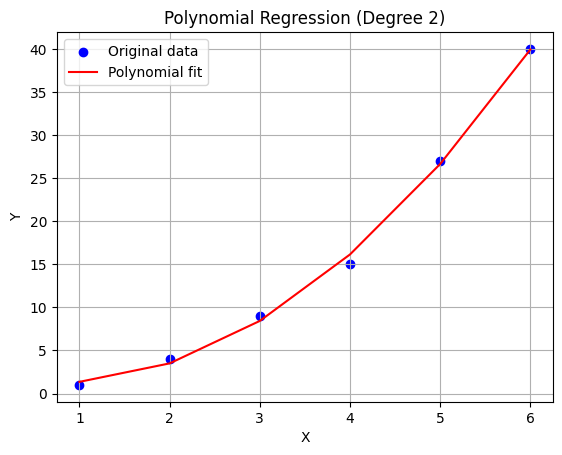

Mean Squared Error: 0.36
R-squared Score: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # To transform input data to polynomial form
from sklearn.metrics import mean_squared_error,r2_score

# Step 1: Define the data
x = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([1, 4, 9, 15, 27, 40])

# Step 2: Create polynomial features (degree = 2 or 3)
poly = PolynomialFeatures(degree=2)  # (if x=1 then == [1,x,x^2])
x_poly = poly.fit_transform(x) # Given polynomial

# Step 3: Fit the model
model = LinearRegression() #Initialize linear model
model.fit(x_poly, y) #Trains the model to learn the polynomial fn

# Step 4: Predict
y_pred = model.predict(x_poly)# predict the y values for x

# Step 5: Plot the results
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_pred, color='red', label='Polynomial fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()

#Evaluate the model
mse = mean_squared_error(y, y_pred) #Min
r2 = r2_score(y, y_pred)#Max

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# UNSUPERVISED LEARNING

**K-Means Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # K for number of clusters
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [ ]:
# Loading Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()
# Reduce Dimentionality with PCA
X = df.iloc[:, :-1] # extracting the index specified(in pandas iloc is a slicing operator)( all the rows and columns exept -1)
pca = PCA(n_components=2) # Reduce 4D data to 2 components
X_pca = pca.fit_transform(X) # Gives 2D version of original data

kmeans = KMeans(n_clusters=3, random_state=40, n_init=10) #nclusters- want to form 3 clusters cause iris has 3 classes, n_init-runs k means 10 times and pick the best one
kmeans.fit(X_pca) # Trains the KMeans model on your 2D PCA-transformed data.

new_point = [[7.5, 9.5, 1.4, 0.2]] # A custom 4D data
y_pred1 = kmeans.predict(pca.transform(new_point))
print(f'Cluster for point {new_point[0]}:{y_pred1}')

# Output the sepal length below is found in [1] versicolor

Cluster for point [7.5, 9.5, 1.4, 0.2]:[1]


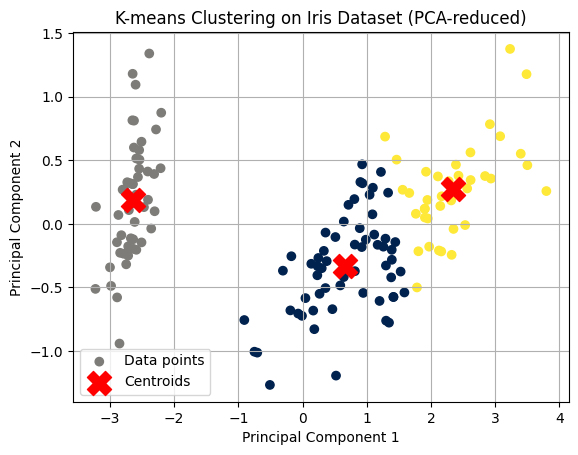

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='cividis', label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Cluster centroids (in PCA-reduced space):")
print(kmeans.cluster_centers_)

Cluster centroids (in PCA-reduced space):
[[ 0.66567601 -0.3316042 ]
 [-2.64241546  0.19088505]
 [ 2.34652659  0.27393856]]
